!pip install pandas matplotlib seaborn plotly


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving climate_change_dataset.csv to climate_change_dataset (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('climate_change_dataset.csv')


In [ ]:
df.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.3+ KB


In [ ]:
df.describe()

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,2011.432000,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000
max,2023.000000,34.900000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['Year'] = df['Year'].astype(int)



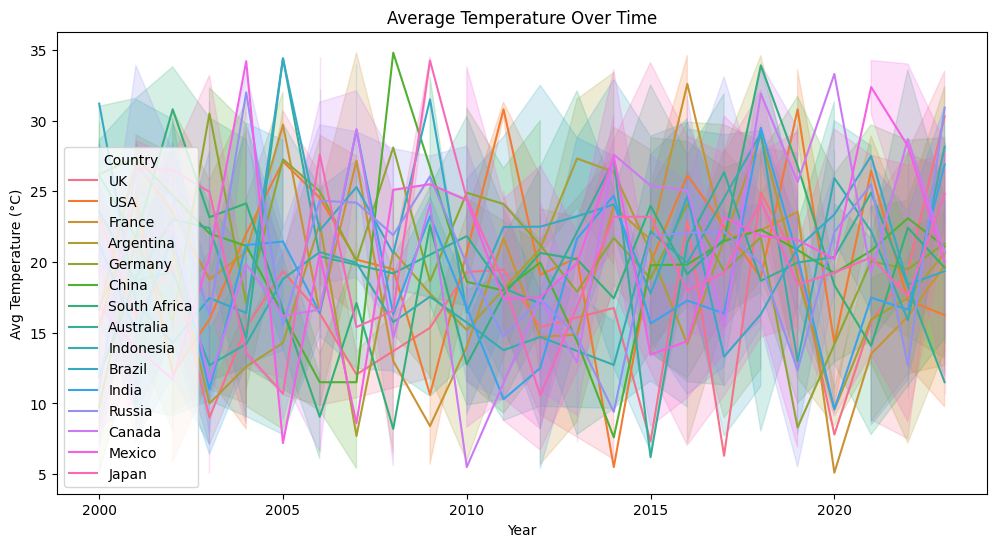

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Avg Temperature (°C)', hue='Country')
plt.title('Average Temperature Over Time')
plt.show()

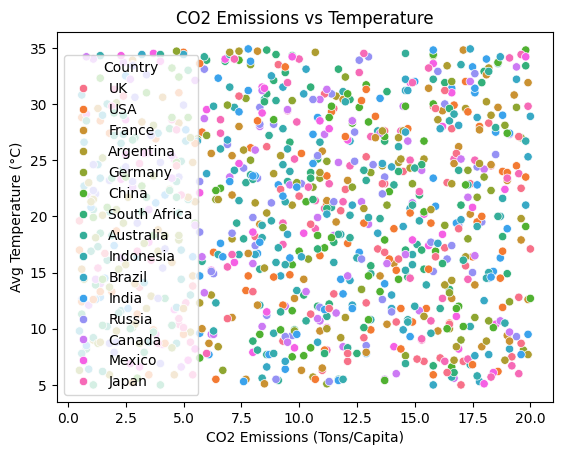

In [ ]:
sns.scatterplot(data=df, x='CO2 Emissions (Tons/Capita)', y='Avg Temperature (°C)', hue='Country')
plt.title('CO2 Emissions vs Temperature')
plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

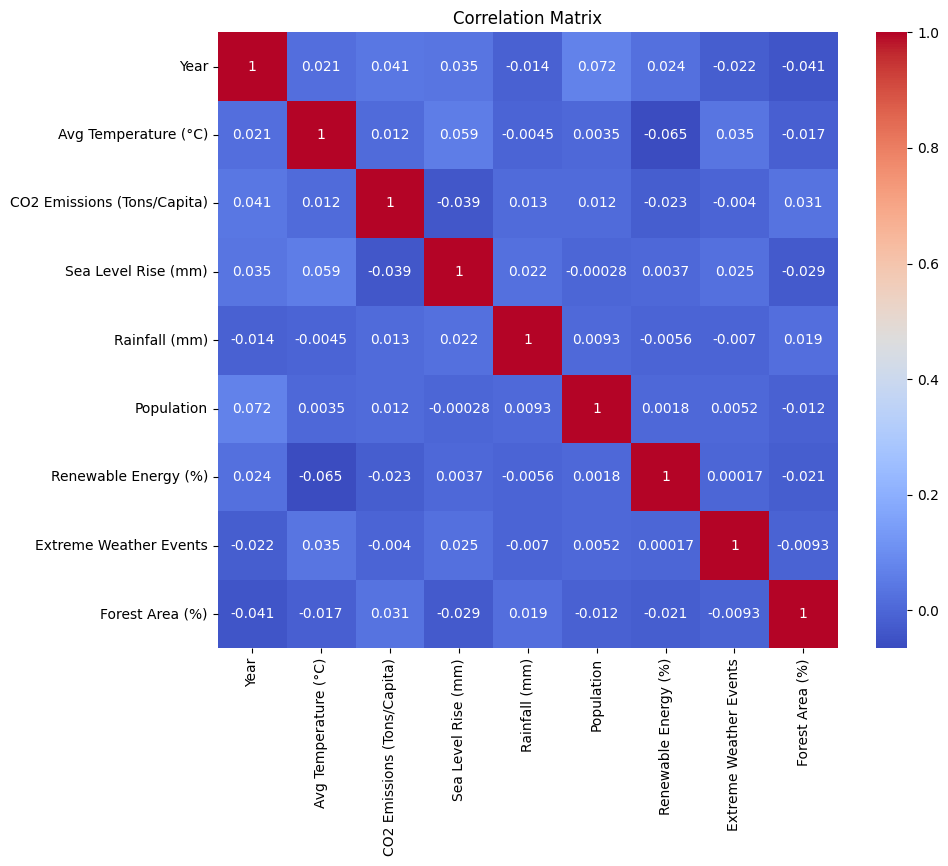

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

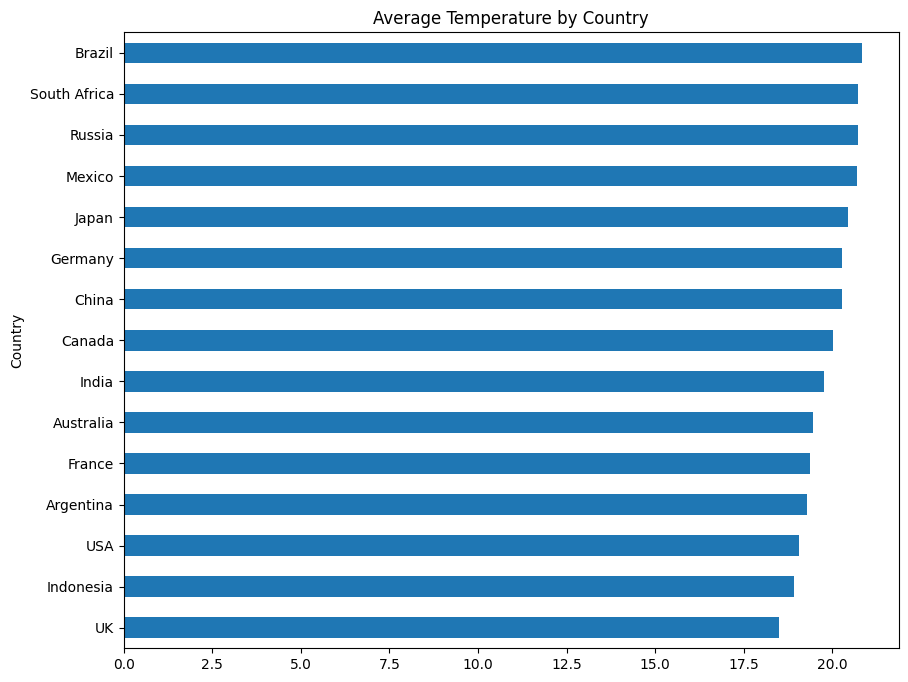

In [ ]:

df.groupby('Country')['Avg Temperature (°C)'].mean().sort_values().plot(kind='barh', figsize=(10,8))
plt.title('Average Temperature by Country')
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression

X = df[['CO2 Emissions (Tons/Capita)', 'Rainfall (mm)']]
y = df['Avg Temperature (°C)']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.88455213e-02 -5.65970187e-05]
Intercept: 19.785029053227095


In [ ]:
df.to_csv('cleaned_climate_data.csv', index=False)
files.download('cleaned_climate_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(1000, 10)